In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio

In [100]:
file_path = "./Mn:ZnCdS_Data/86-GLS-CLR-200ms-1.tif"

def read_tiff_file(file_path):
    # Read the TIFF file
    tiff_reader = imageio.get_reader(file_path)

    # Initialize an empty list to store frames as NumPy arrays
    frames_list = []

    # Iterate through frames and convert each to a NumPy array
    for frame in tiff_reader:
        frame_array = np.array(frame)
        frames_list.append(frame_array)

    # Close the TIFF reader
    tiff_reader.close()

    return frames_list

# Example usage
frames = read_tiff_file(file_path)
# print(frames[0][1].shape)
# size = 1
# frames = torch.tensor(mov.read())
# while True:
#     img = mov.next()
#     torch.stack((frames, img))
# print(np.max(frames[0][0]))

(948, 620)
68


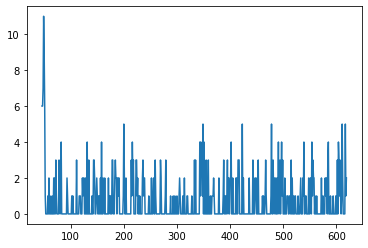

In [98]:
size = frames[0].shape
depth = size[0]
height = size[1]
width = size[2]
spectra = []
for l in range(depth):
    mean = []
    for i in range(width):
        column = frames[0][l][:, i]
        mean.append(np.mean(column))
    zeroth_order = np.argmax(mean)
    # print(zeroth_order)
    particle_location = np.argsort(frames[0][0][:, zeroth_order])[-3:]
    for k in range(len(particle_location)):
            spectra.append(frames[0][0][k, zeroth_order:])

# columns = np.arange(0, width)
# plt.plot(columns, mean)
# rows = np.arange(0, height)
# plt.plot(rows, frames[0][0][:, zeroth_order])
spectra_pixels = np.arange(zeroth_order, width)
plt.plot(spectra_pixels, spectra[2])

In [75]:
size = frames[0].shape
size[0]

49